Does Index move differently on different days of the week?

My interest in Financial markets started 12-13 years back, when I was working at the National Stock Exchange (as a consultant). Seeing the tickers move on the board everyday gives you a feeling of being at the center of things.

I thought I saw a general trend where stock prices generally setlled a bit lower on Fridays before the Close and rose back to normal levels again after Monday Open. I had rationalized this internally thinking people would generally square off their positions going into the weekend. But I haven't seen any proof to substantiate this, so decided to test it out.

Looking at individual prices of every stock would have been too chaotic. So, we'll keep our analysis limited to Nifty 50 index, which should give us a general idea. Nifty 50 consists of 50 most important comapnies trading in National Stock Exchange - so, we are mainly looking at Blue Chip companies here. Comparable index would be Bombay Stock Exchange's SENSEX.

We are going to use pandas_datareader to import Nifty 50 Index data from Yahoo Finance.

In [1]:
from pandas_datareader import data
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This part is required to fix Yahoo Finance api for pandas_datareader, broke some time between August 2022 and January 2023. Index data is also available through stooq api (that does not require this fix), but looks like that only has data for Sensex and not Nifty. I had done an earlier version of this project with Sensex data itself, decided to use Nifty50 data this time.

In [2]:
import yfinance as yf
yf.pdr_override()

In [3]:
NSEI = data.get_data_yahoo('^NSEI', start = '2009-12-31', end = '2023-01-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
NSEI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3210 entries, 2009-12-31 00:00:00+05:30 to 2023-01-30 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3210 non-null   float64
 1   High       3210 non-null   float64
 2   Low        3210 non-null   float64
 3   Close      3210 non-null   float64
 4   Adj Close  3210 non-null   float64
 5   Volume     3210 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 175.5 KB


In [5]:
NSEI.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31 00:00:00+05:30,5171.200195,5221.850098,5168.750000,5201.049805,5201.049805,0
2010-01-04 00:00:00+05:30,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05 00:00:00+05:30,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06 00:00:00+05:30,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07 00:00:00+05:30,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0


In [6]:
NSEI.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-23 00:00:00+05:30,18118.449219,18162.599609,18063.449219,18118.550781,18118.550781,202500
2023-01-24 00:00:00+05:30,18183.949219,18201.250000,18078.650391,18118.300781,18118.300781,216900
2023-01-25 00:00:00+05:30,18093.349609,18100.599609,17846.150391,17891.949219,17891.949219,257200
2023-01-27 00:00:00+05:30,17877.199219,17884.750000,17493.550781,17604.349609,17604.349609,476300
2023-01-30 00:00:00+05:30,17541.949219,17709.150391,17405.550781,17648.949219,17648.949219,432400


We picked up the start date as 31st december 2009. This was done so that we can get Market Move information(with respect to previous day's price) from the beginning of 2010. If we had selected start date as 1st of Jan 2010, then the first day of 2010 won't have Market Move data.

Although the end date was 31st Jan, we have data till 30th Jan. This is probably due to default time stamp(00:00) being applied to dates - till 31st Jan midnight only Data for 30th would be available. It's not critical for our purpose to have data till 31st, but let's use a datetime (instead of date) to test our theory. Timezone coversion is not a factor here, but let's use IST to be sure.
for 2010, Data starts on 4th of January -this is correct, since 1st Jan(Friday) was a holiday.

In [7]:
IST = dt.timezone(dt.timedelta(hours = 5, minutes = 30))
startTime = dt.datetime(2009, 12, 31, tzinfo = IST)
endTime = dt.datetime(2023, 1, 31, 23, 59, 59, tzinfo = IST)
print(startTime, endTime)

2009-12-31 00:00:00+05:30 2023-01-31 23:59:59+05:30


In [8]:
NSEI = data.get_data_yahoo('^NSEI', start = startTime, end = endTime)

[*********************100%***********************]  1 of 1 completed


In [9]:
NSEI.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-24 00:00:00+05:30,18183.949219,18201.250000,18078.650391,18118.300781,18118.300781,216900
2023-01-25 00:00:00+05:30,18093.349609,18100.599609,17846.150391,17891.949219,17891.949219,257200
2023-01-27 00:00:00+05:30,17877.199219,17884.750000,17493.550781,17604.349609,17604.349609,476300
2023-01-30 00:00:00+05:30,17541.949219,17709.150391,17405.550781,17648.949219,17648.949219,432400
2023-01-31 00:00:00+05:30,17731.449219,17735.699219,17537.550781,17662.150391,17662.150391,398300


In [10]:
NSEI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3211 entries, 2009-12-31 00:00:00+05:30 to 2023-01-31 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3211 non-null   float64
 1   High       3211 non-null   float64
 2   Low        3211 non-null   float64
 3   Close      3211 non-null   float64
 4   Adj Close  3211 non-null   float64
 5   Volume     3211 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 175.6 KB


1 extra record for 31st January, 2023. Let's explore the data now.

In [11]:
NSEI[NSEI['Close'] != NSEI['Adj Close']]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Adjusted Close can be differrent from Close price to account for Corporate Actions and such. Index usually don't have Corporate actions, and this is what we see above - we don't need a separate column.

In [12]:
NSEI.drop('Adj Close', axis = 1, inplace = True)

In [13]:
NSEI.index.strftime('%Y-%m')

Index(['2009-12', '2010-01', '2010-01', '2010-01', '2010-01', '2010-01',
       '2010-01', '2010-01', '2010-01', '2010-01',
       ...
       '2023-01', '2023-01', '2023-01', '2023-01', '2023-01', '2023-01',
       '2023-01', '2023-01', '2023-01', '2023-01'],
      dtype='object', name='Date', length=3211)

In [14]:
NSEI.describe()

,Open,High,Low,Close,Volume
count,3211.000000,3211.000000,3211.000000,3211.000000,3.211000e+03
mean,9464.137466,9512.876133,9399.257920,9457.069185,2.285035e+05
std,3873.192059,3888.117248,3849.334215,3870.230195,2.167988e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,0.000000e+00
25%,5945.349854,5981.650146,5908.500000,5944.050049,1.037500e+05
50%,8548.450195,8601.150391,8506.150391,8543.049805,1.851000e+05
75%,11377.699707,11423.300293,11302.024902,11356.125000,2.975000e+05
max,18871.949219,18887.599609,18778.199219,18812.500000,1.811000e+06


I want to see how much the value of the index fluctuated within the day - will create a datapoint comparing days' High and Low prices.

In [15]:
NSEI['PriceFluctuation'] = (NSEI.High - NSEI.Low) * 100 / NSEI.Low

In [16]:
NSEI.describe()

,Open,High,Low,Close,Volume,PriceFluctuation
count,3211.000000,3211.000000,3211.000000,3211.000000,3.211000e+03,3211.000000
mean,9464.137466,9512.876133,9399.257920,9457.069185,2.285035e+05,1.254315
std,3873.192059,3888.117248,3849.334215,3870.230195,2.167988e+05,0.872175
min,4623.149902,4623.149902,4531.149902,4544.200195,0.000000e+00,0.246534
25%,5945.349854,5981.650146,5908.500000,5944.050049,1.037500e+05,0.766193
50%,8548.450195,8601.150391,8506.150391,8543.049805,1.851000e+05,1.060460
75%,11377.699707,11423.300293,11302.024902,11356.125000,2.975000e+05,1.497645
max,18871.949219,18887.599609,18778.199219,18812.500000,1.811000e+06,18.967102


In [17]:
display(NSEI[NSEI.PriceFluctuation >= 5])
print(NSEI[NSEI.PriceFluctuation >= 5].shape)

,Open,High,Low,Close,Volume,PriceFluctuation
Date,,,,,,
2012-10-05 00:00:00+05:30,5815.000000,5815.350098,4888.200195,5746.950195,0,18.967102
2014-05-16 00:00:00+05:30,7270.200195,7563.500000,7130.649902,7203.000000,393200,6.070276
2016-11-09 00:00:00+05:30,8067.500000,8476.200195,8002.250000,8432.000000,314300,5.922712
2019-09-20 00:00:00+05:30,10746.799805,11381.900391,10691.000000,11274.200195,1356800,6.462449
2020-03-12 00:00:00+05:30,10039.950195,10040.750000,9508.000000,9590.150391,1343500,5.603176
2020-03-13 00:00:00+05:30,9107.599609,10159.400391,8555.150391,9955.200195,1388000,18.751862
2020-03-17 00:00:00+05:30,9285.400391,9403.799805,8915.599609,8967.049805,935600,5.475798
2020-03-18 00:00:00+05:30,9088.450195,9127.549805,8407.049805,8468.799805,1516600,8.570188
2020-03-19 00:00:00+05:30,8063.299805,8575.450195,7832.549805,8263.450195,925700,9.484783


(17, 6)


In [18]:
display(NSEI[(NSEI.PriceFluctuation >= 5) & (NSEI.index.strftime('%Y-%m') == '2020-03')])
print(NSEI[(NSEI.PriceFluctuation >= 5) & (NSEI.index.strftime('%Y-%m') == '2020-03')].shape)

,Open,High,Low,Close,Volume,PriceFluctuation
Date,,,,,,
2020-03-12 00:00:00+05:30,10039.950195,10040.750000,9508.000000,9590.150391,1343500,5.603176
2020-03-13 00:00:00+05:30,9107.599609,10159.400391,8555.150391,9955.200195,1388000,18.751862
2020-03-17 00:00:00+05:30,9285.400391,9403.799805,8915.599609,8967.049805,935600,5.475798
2020-03-18 00:00:00+05:30,9088.450195,9127.549805,8407.049805,8468.799805,1516600,8.570188
2020-03-19 00:00:00+05:30,8063.299805,8575.450195,7832.549805,8263.450195,925700,9.484783
2020-03-20 00:00:00+05:30,8284.450195,8883.000000,8178.200195,8745.450195,1071500,8.618031
2020-03-23 00:00:00+05:30,7945.700195,8159.250000,7583.600098,7610.250000,653500,7.590721
2020-03-24 00:00:00+05:30,7848.299805,8036.950195,7511.100098,7801.049805,738400,7.000973
2020-03-25 00:00:00+05:30,7735.149902,8376.750000,7714.750000,8317.849609,736900,8.580965


(11, 6)


2 of these dates stand out with more than 18% fluctuation - 5th Oct 2012, 13th March 2020. The first date is infamous as the NSE Flash Crash. Funny story - I was working in the NSE BKC offices at that time, remember the hectic work day and worried looks. The 2nd date is during Covid panic - looks like a day with high volatility, index ended up Closing higher than the Open price though. Not just this date, looks like 11 of these 17 relatively high volatility(day's High price 5% or more up than day's Low price) are from March 2020. For the rest of the Dates, the fluctuation is within resaonable amount. In general, this is how the Price Fluctuation is distributed:

Text(0.5, 1.0, 'Distribution of Price Fluctuation (High/Low) Within A Day')

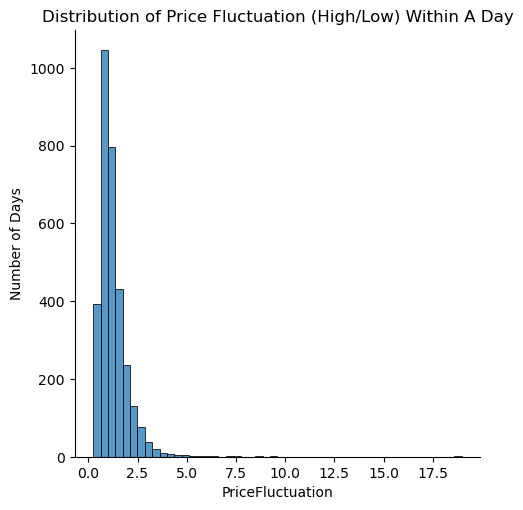

In [19]:
sns.displot(NSEI.PriceFluctuation, bins = 50)
plt.ylabel('Number of Days')
plt.title('Distribution of Price Fluctuation (High/Low) Within A Day')

Looks like we don't have Volume data for 5th October, 2012. This might be due to some technical issue. Luckily - for our analysis, Volume shouldn't be too critical. Let's see how many records are there with missing Volume data.

In [20]:
NSEI[NSEI.Volume == 0]

,Open,High,Low,Close,Volume,PriceFluctuation
Date,,,,,,
2009-12-31 00:00:00+05:30,5171.200195,5221.850098,5168.750000,5201.049805,0,1.027330
2010-01-04 00:00:00+05:30,5200.899902,5238.450195,5167.100098,5232.200195,0,1.380854
2010-01-05 00:00:00+05:30,5277.149902,5288.350098,5242.399902,5277.899902,0,0.876511
2010-01-06 00:00:00+05:30,5278.149902,5310.850098,5260.049805,5281.799805,0,0.965776
2010-01-07 00:00:00+05:30,5281.799805,5302.549805,5244.750000,5263.100098,0,1.102051
...,...,...,...,...,...,...
2021-03-08 00:00:00+05:30,15002.450195,15111.150391,14919.900391,14956.200195,0,1.281845
2021-04-07 00:00:00+05:30,14716.450195,14879.799805,14649.849609,14819.049805,0,1.569642
2021-05-27 00:00:00+05:30,15323.950195,15384.549805,15272.500000,15337.849609,0,0.733670


This is quite a lot.

Let's also look at the high volume(top 1%) days -

In [21]:
volume_Top1pct = np.quantile(NSEI.Volume, 0.99)
print(volume_Top1pct)
display(NSEI[NSEI.Volume >= volume_Top1pct])
print(NSEI[NSEI.Volume >= volume_Top1pct].shape)

896060.0000000003


,Open,High,Low,Close,Volume,PriceFluctuation
Date,,,,,,
2019-09-20 00:00:00+05:30,10746.799805,11381.900391,10691.000000,11274.200195,1356800,6.462449
2019-10-01 00:00:00+05:30,11515.400391,11554.200195,11247.900391,11359.900391,1305400,2.723173
2019-10-03 00:00:00+05:30,11322.250000,11370.400391,11257.349609,11314.000000,1017500,1.004240
2019-10-04 00:00:00+05:30,11388.450195,11400.299805,11158.349609,11174.750000,928500,2.168333
2019-10-29 00:00:00+05:30,11643.950195,11809.400391,11627.349609,11786.849609,951700,1.565712
2019-10-31 00:00:00+05:30,11890.450195,11945.000000,11855.099609,11877.450195,1414800,0.758327
2019-11-26 00:00:00+05:30,12110.200195,12132.450195,12006.349609,12037.700195,1201300,1.050282
2019-12-11 00:00:00+05:30,11867.349609,11923.200195,11832.299805,11910.150391,997700,0.768239
2020-03-05 00:00:00+05:30,11306.049805,11389.500000,11244.599609,11269.000000,1352500,1.288622


(33, 6)


In [22]:
display(NSEI[(NSEI.Volume >= volume_Top1pct) & (NSEI.index.strftime('%Y-%m') == '2020-03')])
print(NSEI[(NSEI.Volume >= volume_Top1pct) & (NSEI.index.strftime('%Y-%m') == '2020-03')].shape)

,Open,High,Low,Close,Volume,PriceFluctuation
Date,,,,,,
2020-03-05 00:00:00+05:30,11306.049805,11389.500000,11244.599609,11269.000000,1352500,1.288622
2020-03-06 00:00:00+05:30,10942.650391,11035.099609,10827.400391,10989.450195,1811000,1.918274
2020-03-09 00:00:00+05:30,10742.049805,10751.549805,10294.450195,10451.450195,1565500,4.440253
2020-03-11 00:00:00+05:30,10334.299805,10545.099609,10334.000000,10458.400391,1218500,2.042768
2020-03-12 00:00:00+05:30,10039.950195,10040.750000,9508.000000,9590.150391,1343500,5.603176
2020-03-13 00:00:00+05:30,9107.599609,10159.400391,8555.150391,9955.200195,1388000,18.751862
2020-03-16 00:00:00+05:30,9587.799805,9602.200195,9165.099609,9197.400391,897700,4.769185
2020-03-17 00:00:00+05:30,9285.400391,9403.799805,8915.599609,8967.049805,935600,5.475798
2020-03-18 00:00:00+05:30,9088.450195,9127.549805,8407.049805,8468.799805,1516600,8.570188


(11, 6)


Although Volume Data isn't complete, we have 33 days where volume is in Top 1%, and 11 of those days are in March 2020.

Indian Indexes have had a phenomenal run over the last decade. Let's take a quick look -

Text(0.5, 1.0, 'Nifty 50 Close Prices Over The Years')

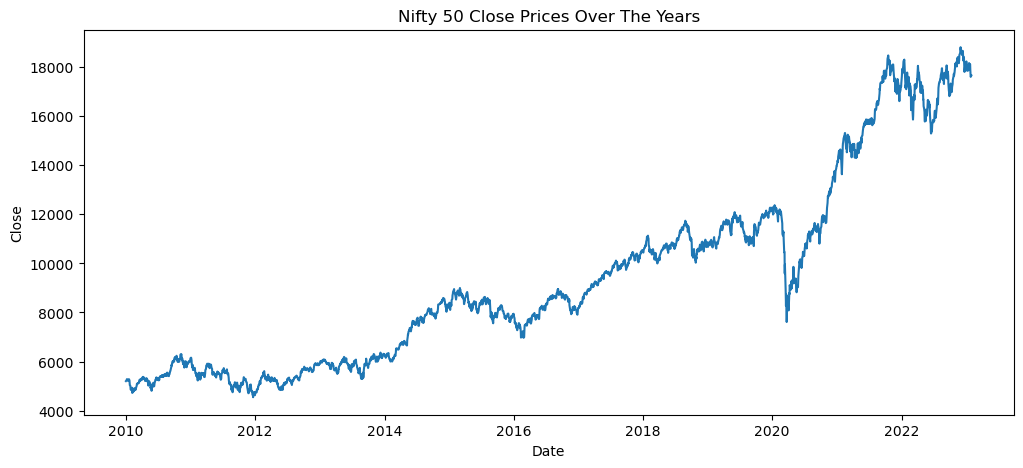

In [23]:
plt.figure(figsize = (12, 5))
sns.lineplot(data = NSEI, y = 'Close', x = NSEI.index)
plt.title('Nifty 50 Close Prices Over The Years')

Which Year did it perform the Best though?

In [24]:
NSEI_YrlyCloseMean = NSEI.Close.resample('Y').mean()
print(NSEI_YrlyCloseMean)

Date
2009-12-31 00:00:00+05:30     5201.049805
2010-12-31 00:00:00+05:30     5460.534807
2011-12-31 00:00:00+05:30     5339.145453
2012-12-31 00:00:00+05:30     5348.776444
2013-12-31 00:00:00+05:30     5913.363764
2014-12-31 00:00:00+05:30     7370.956474
2015-12-31 00:00:00+05:30     8283.386681
2016-12-31 00:00:00+05:30     8088.159222
2017-12-31 00:00:00+05:30     9590.717943
2018-12-31 00:00:00+05:30    10750.673270
2019-12-31 00:00:00+05:30    11435.851056
2020-12-31 00:00:00+05:30    11152.998207
2021-12-31 00:00:00+05:30    16026.760652
2022-12-31 00:00:00+05:30    17245.430463
2023-12-31 00:00:00+05:30    17968.745071
Freq: A-DEC, Name: Close, dtype: float64


                                  Close         Diff    DiffPct
Date                                                           
2009-12-31 00:00:00+05:30   5201.049805          NaN        NaN
2010-12-31 00:00:00+05:30   5460.534807   259.485002   4.989089
2011-12-31 00:00:00+05:30   5339.145453  -121.389353  -2.223030
2012-12-31 00:00:00+05:30   5348.776444     9.630991   0.180384
2013-12-31 00:00:00+05:30   5913.363764   564.587320  10.555448
2014-12-31 00:00:00+05:30   7370.956474  1457.592710  24.649130
2015-12-31 00:00:00+05:30   8283.386681   912.430207  12.378722
2016-12-31 00:00:00+05:30   8088.159222  -195.227459  -2.356856
2017-12-31 00:00:00+05:30   9590.717943  1502.558721  18.577264
2018-12-31 00:00:00+05:30  10750.673270  1159.955327  12.094562
2019-12-31 00:00:00+05:30  11435.851056   685.177786   6.373348
2020-12-31 00:00:00+05:30  11152.998207  -282.852849  -2.473387
2021-12-31 00:00:00+05:30  16026.760652  4873.762445  43.699123
2022-12-31 00:00:00+05:30  17245.430463 

Text(0.5, 1.0, 'Nifty 50 Yearly Mean CLose Price Over The Years')

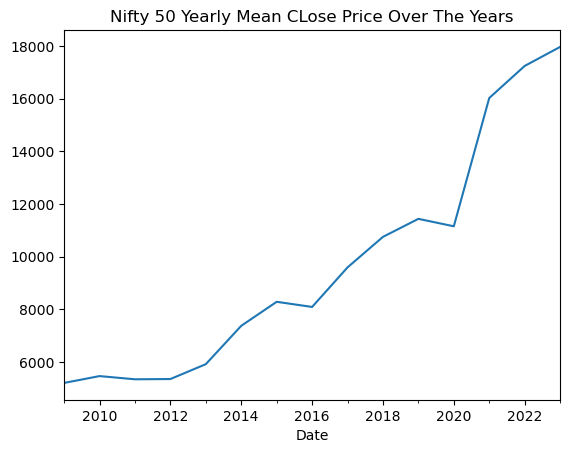

In [25]:
NSEI_YrlyCloseMean_df = pd.DataFrame(NSEI_YrlyCloseMean)
NSEI_YrlyCloseMean_df['Diff'] = NSEI_YrlyCloseMean_df.Close.diff()
NSEI_YrlyCloseMean_df['DiffPct'] = NSEI_YrlyCloseMean_df.Close.pct_change() * 100
print(NSEI_YrlyCloseMean_df)
NSEI_YrlyCloseMean_df.Close.plot()
plt.title('Nifty 50 Yearly Mean CLose Price Over The Years')

By looking at the yearly mean Close prices and how they have grown, 2021 emerges as the best year for Nifty50 Index.

************************************************************************
Now Let's get back to our main goal - we need to see whether Index price moves Up or Down depending on which day of week it is.

In [26]:
NSEI['CloseDiff'] = NSEI.Close.diff()
NSEI['CloseDiffPct'] = NSEI.Close.pct_change() * 100
NSEI.head()

,Open,High,Low,Close,Volume,PriceFluctuation,CloseDiff,CloseDiffPct
Date,,,,,,,,
2009-12-31 00:00:00+05:30,5171.200195,5221.850098,5168.750000,5201.049805,0,1.027330,NaN,NaN
2010-01-04 00:00:00+05:30,5200.899902,5238.450195,5167.100098,5232.200195,0,1.380854,31.150391,0.598925
2010-01-05 00:00:00+05:30,5277.149902,5288.350098,5242.399902,5277.899902,0,0.876511,45.699707,0.873432
2010-01-06 00:00:00+05:30,5278.149902,5310.850098,5260.049805,5281.799805,0,0.965776,3.899902,0.073891
2010-01-07 00:00:00+05:30,5281.799805,5302.549805,5244.750000,5263.100098,0,1.102051,-18.699707,-0.354040


In [27]:
NSEI['MarketMove'] = NSEI.CloseDiff.apply(lambda x : 'Up' if x > 0 else 'Down')
NSEI.head()

,Open,High,Low,Close,Volume,PriceFluctuation,CloseDiff,CloseDiffPct,MarketMove
Date,,,,,,,,,
2009-12-31 00:00:00+05:30,5171.200195,5221.850098,5168.750000,5201.049805,0,1.027330,NaN,NaN,Down
2010-01-04 00:00:00+05:30,5200.899902,5238.450195,5167.100098,5232.200195,0,1.380854,31.150391,0.598925,Up
2010-01-05 00:00:00+05:30,5277.149902,5288.350098,5242.399902,5277.899902,0,0.876511,45.699707,0.873432,Up
2010-01-06 00:00:00+05:30,5278.149902,5310.850098,5260.049805,5281.799805,0,0.965776,3.899902,0.073891,Up
2010-01-07 00:00:00+05:30,5281.799805,5302.549805,5244.750000,5263.100098,0,1.102051,-18.699707,-0.354040,Down


In [28]:
NSEI.loc['2009']

,Open,High,Low,Close,Volume,PriceFluctuation,CloseDiff,CloseDiffPct,MarketMove
Date,,,,,,,,,
2009-12-31 00:00:00+05:30,5171.200195,5221.850098,5168.75,5201.049805,0,1.02733,NaN,NaN,Down


The one record from 2009 has served its pupose now, all the records from 2010 have Close price movement information. We can drop this row now.

In [29]:
NSEI.drop(index = '2009-12-31', inplace = True)
NSEI.head()

,Open,High,Low,Close,Volume,PriceFluctuation,CloseDiff,CloseDiffPct,MarketMove
Date,,,,,,,,,
2010-01-04 00:00:00+05:30,5200.899902,5238.450195,5167.100098,5232.200195,0,1.380854,31.150391,0.598925,Up
2010-01-05 00:00:00+05:30,5277.149902,5288.350098,5242.399902,5277.899902,0,0.876511,45.699707,0.873432,Up
2010-01-06 00:00:00+05:30,5278.149902,5310.850098,5260.049805,5281.799805,0,0.965776,3.899902,0.073891,Up
2010-01-07 00:00:00+05:30,5281.799805,5302.549805,5244.750000,5263.100098,0,1.102051,-18.699707,-0.354040,Down
2010-01-08 00:00:00+05:30,5264.250000,5276.750000,5234.700195,5244.750000,0,0.803290,-18.350098,-0.348656,Down


Text(0.5, 1.0, 'Distribution of Close Price Difference')

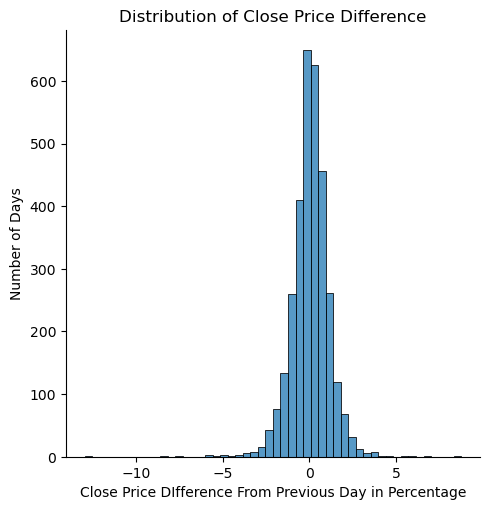

In [30]:
sns.displot(NSEI.CloseDiffPct, bins = 50)
plt.xlabel('Close Price DIfference From Previous Day in Percentage')
plt.ylabel('Number of Days')
plt.title('Distribution of Close Price Difference')

A nice Normal Distribution with mean at 0, and some outliers.

Last thing we need is name of the day of the week.

In [31]:
NSEI['DayOfWeek'] = NSEI.index.day_name()
NSEI.tail()

,Open,High,Low,Close,Volume,PriceFluctuation,CloseDiff,CloseDiffPct,MarketMove,DayOfWeek
Date,,,,,,,,,,
2023-01-24 00:00:00+05:30,18183.949219,18201.250000,18078.650391,18118.300781,216900,0.678146,-0.250000,-0.001380,Down,Tuesday
2023-01-25 00:00:00+05:30,18093.349609,18100.599609,17846.150391,17891.949219,257200,1.425793,-226.351562,-1.249298,Down,Wednesday
2023-01-27 00:00:00+05:30,17877.199219,17884.750000,17493.550781,17604.349609,476300,2.236248,-287.599609,-1.607425,Down,Friday
2023-01-30 00:00:00+05:30,17541.949219,17709.150391,17405.550781,17648.949219,432400,1.744269,44.599609,0.253344,Up,Monday
2023-01-31 00:00:00+05:30,17731.449219,17735.699219,17537.550781,17662.150391,398300,1.129852,13.201172,0.074799,Up,Tuesday


Text(0.5, 1.0, 'Close Price Difference Percentage on Various Days of The Week')

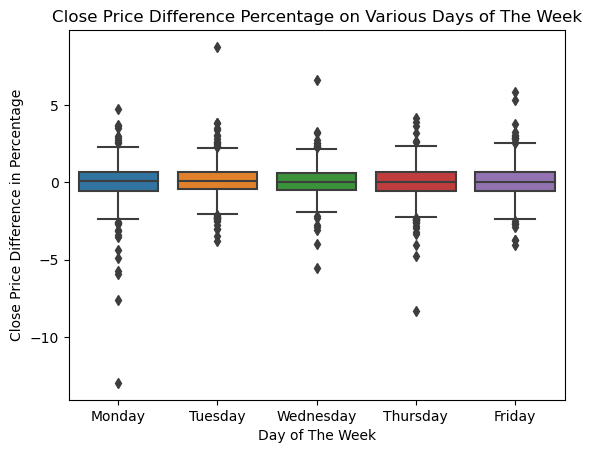

In [32]:
sns.boxplot(x = 'DayOfWeek', y = 'CloseDiffPct', data = NSEI)
plt.xlabel('Day of The Week')
plt.ylabel('Close Price Difference in Percentage')
plt.title('Close Price Difference Percentage on Various Days of The Week')

Keeping outliers aside, these boxplots are alomost identical with close to 0 median - as was indicated by the distribution plot with close to 0 mean. There is no evidence of Close Price moving more or less aggressively on different days of the week.

Let's clean up the table a bit. We're not using Open, High, Low, Volume data anymore - let's remove them.

In [33]:
NSEI.drop(columns = ['Open', 'High', 'Low', 'Volume'], inplace = True)

In [34]:
NSEI.head()

,Close,PriceFluctuation,CloseDiff,CloseDiffPct,MarketMove,DayOfWeek
Date,,,,,,
2010-01-04 00:00:00+05:30,5232.200195,1.380854,31.150391,0.598925,Up,Monday
2010-01-05 00:00:00+05:30,5277.899902,0.876511,45.699707,0.873432,Up,Tuesday
2010-01-06 00:00:00+05:30,5281.799805,0.965776,3.899902,0.073891,Up,Wednesday
2010-01-07 00:00:00+05:30,5263.100098,1.102051,-18.699707,-0.354040,Down,Thursday
2010-01-08 00:00:00+05:30,5244.750000,0.803290,-18.350098,-0.348656,Down,Friday


We are now ready to see the effect of the DayOfWeek on the MarketMove. Let's also quickly export this processed data, so that it can be used to create a Dashboard of sort in Tableau, available here : https://public.tableau.com/views/Nifty50PriceAnalysis/PriceMoveVsDayOfWeek?

In [35]:
NSEI.to_csv('NSEI.csv')

In [36]:
NSE_grp_DayMove_cnt = NSEI.groupby(['DayOfWeek', 'MarketMove'])['Close'].count()
dayOrder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
print(NSE_grp_DayMove_cnt.loc[dayOrder])

DayOfWeek  MarketMove
Monday     Down          290
           Up            355
Tuesday    Down          295
           Up            352
Wednesday  Down          310
           Up            332
Thursday   Down          308
           Up            335
Friday     Down          308
           Up            325
Name: Close, dtype: int64


Text(0.5, 1.0, 'Number of Trading Days of Week (2010 - 2023), Separated by Index Price Movement')

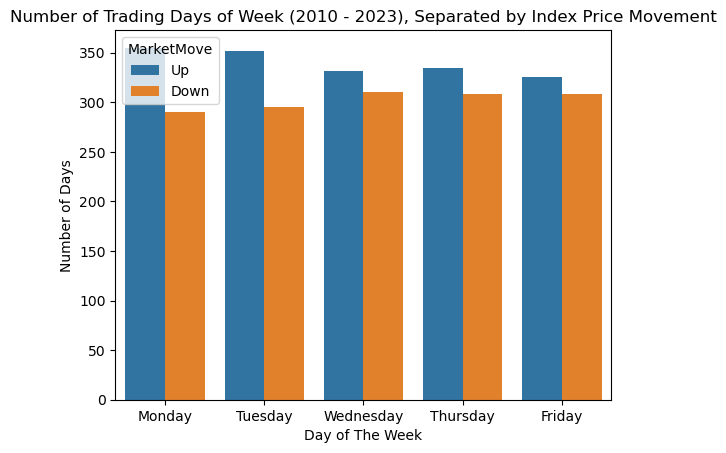

In [37]:
sns.countplot(data = NSEI, x = 'DayOfWeek', hue = 'MarketMove', order = dayOrder)
plt.xlabel('Day of The Week')
plt.ylabel('Number of Days')
plt.title('Number of Trading Days of Week (2010 - 2023), Separated by Index Price Movement')

This does not follow my assumption at all. For all days of the week, there are more days when the Index price has gone up, than the number of days when it has gone down. I can't say this is surprising, given the overall index has gone up so much over the last 12-13 years. But over our data range(1st Januray, 2010 to 31st January, 2023) - there is no evidence that Index price falls on Fridays. If we look more closely, on Mondays and Tuesdays there is a slightly higher chance that index price will go up, than on other days. On Tuesdays, Wednesdays and Fridays - the 'Down-Count' is almost the same and higher than the other 2 days, but the 'Up-Count' is higher for Tuesdays and Wednesdays compared to Fridays. For Fridays, both the counts are closest when compared among all the 5 days - but the 'Up-Count' is still greater.

Last thing we should confirm is whether this has been the trend throughout the years.

In [38]:
NSE_grp_DayMoveYr_cnt = NSEI.groupby([NSEI.index.year, 'DayOfWeek', 'MarketMove'])['Close'].count()
print(NSE_grp_DayMoveYr_cnt)

Date  DayOfWeek  MarketMove
2010  Friday     Down          24
                 Up            23
      Monday     Down          17
                 Up            34
      Thursday   Down          22
                               ..
2023  Thursday   Down           3
      Tuesday    Down           2
                 Up             3
      Wednesday  Down           3
                 Up             1
Name: Close, Length: 139, dtype: int64


In [39]:
NSE_grp_DayMoveYr_cnt[:, 'Friday', :]

Date  MarketMove
2010  Down          24
      Up            23
2011  Down          33
      Up            18
2012  Down          25
      Up            25
2013  Down          25
      Up            23
2014  Down          19
      Up            28
2015  Down          20
      Up            26
2016  Down          22
      Up            27
2017  Down          21
      Up            27
2018  Down          21
      Up            27
2019  Down          21
      Up            29
2020  Down          19
      Up            28
2021  Down          28
      Up            20
2022  Down          27
      Up            23
2023  Down           3
      Up             1
Name: Close, dtype: int64

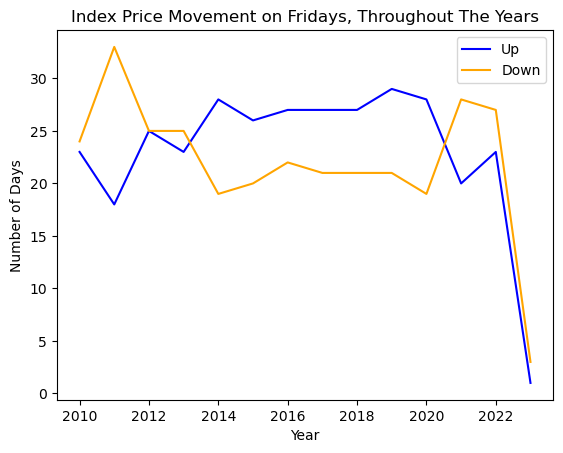

In [40]:
NSE_grp_DayMoveYr_cnt[:, 'Friday', 'Up'].plot(color = 'blue', label = 'Up')
NSE_grp_DayMoveYr_cnt[:, 'Friday', 'Down'].plot(color = 'orange', label = 'Down')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.title('Index Price Movement on Fridays, Throughout The Years')
plt.legend()

Hold on, this paints a different picture. Number of 'Down' days on Fridays were not smaller than numer of 'Up' days in 2010(24 vs 23), <u>2011(33 vs 18)</u>, 2012(same here, 25 on both counts), 2013(25 vs 23) and <u>2021(28 vs 20)</u> - the more drasctic years being 2011 and 2021.

I had started working at NSE in December of 2010. So, whatever 'trend' I thought I had noticed would have been in 2011 - this at least proves I wasn't dreaming :). Also, from what we saw earlier - 2011 was one of the worst years in terms of Index performance, and 2021 was the absolute best. So, not sure what this is, but it isn't a fluke.

Let's look at data from 2011 and 2021 more closely.

Text(0.5, 1.0, 'Number of Trading Days of Week in 2011, Separated by Index Price Movement')

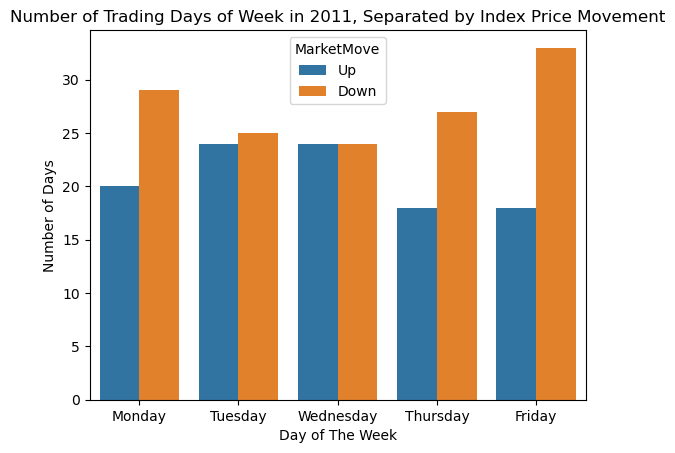

In [41]:
sns.countplot(data = NSEI.loc['2011'], x = 'DayOfWeek', hue = 'MarketMove', order = dayOrder)
plt.xlabel('Day of The Week')
plt.ylabel('Number of Days')
plt.title('Number of Trading Days of Week in 2011, Separated by Index Price Movement')

Text(0.5, 1.0, 'Number of Trading Days of Week in 2021, Separated by Index Price Movement')

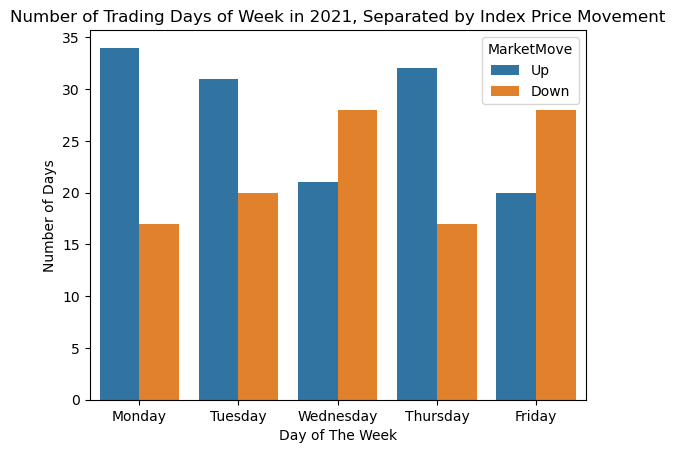

In [42]:
sns.countplot(data = NSEI.loc['2021'], x = 'DayOfWeek', hue = 'MarketMove', order = dayOrder)
plt.xlabel('Day of The Week')
plt.ylabel('Number of Days')
plt.title('Number of Trading Days of Week in 2021, Separated by Index Price Movement')

Text(0.5, 1.0, 'Nifty 50 Close Prices 2021')

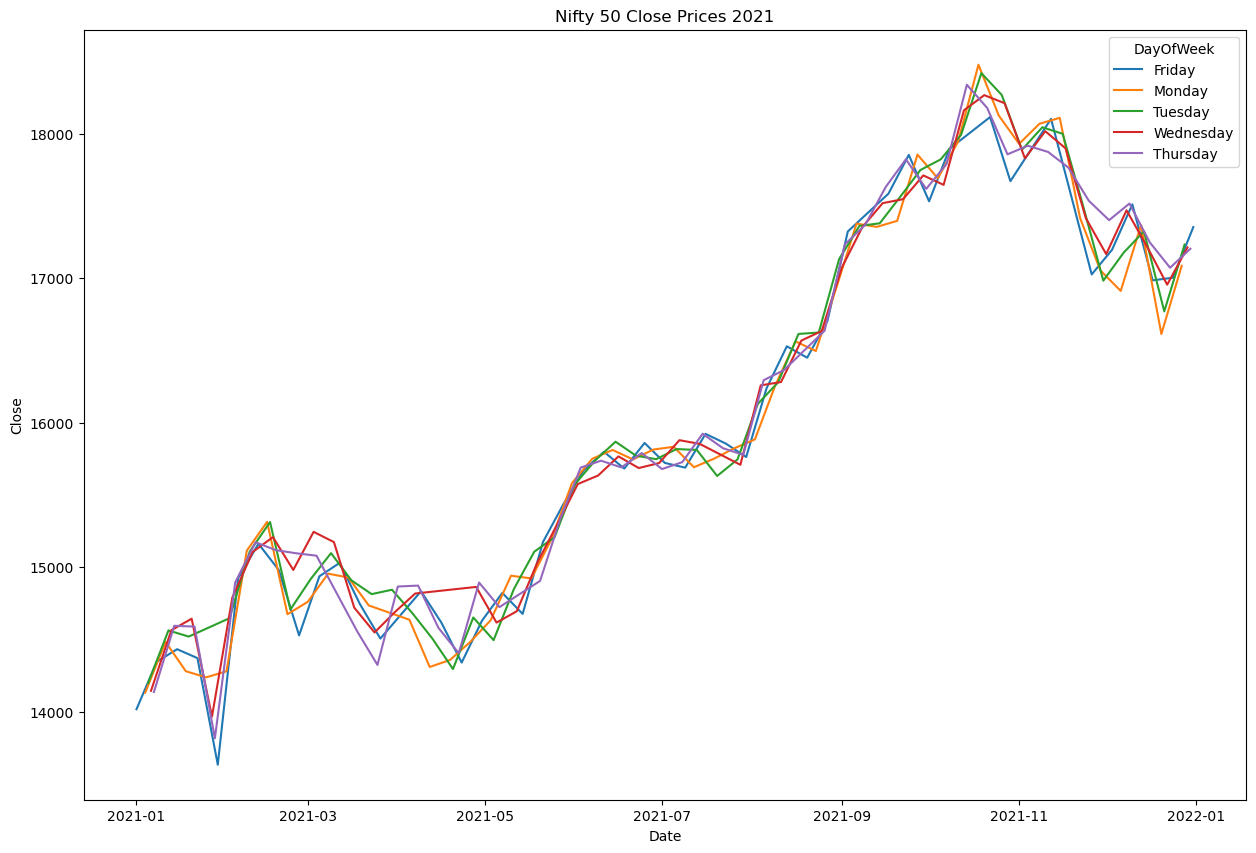

In [43]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = NSEI.loc['2021'], y = 'Close', x = NSEI.loc['2021'].index, hue = 'DayOfWeek')
plt.title('Nifty 50 Close Prices 2021')

For 2011, for almost all the days - number of 'Down-Days' are greater than number of 'Up-Days'. This is not surprising, since 2011 was not a good year for index pricing. Wednesdays and Tuesdays are most balanced, but Fridays have the most number of 'Down-Days', with Mondays and Thursdays close behind.

For 2021, it being a good year, number of 'Up-Days' are much higher on Mondays, Tuesdays, and Thursdays. But there are more 'Down-Days' on Fridays and Wednesdays.

Text(0.5, 1.0, 'Number of Trading Days of Week (2010 - 2023), Separated by Index Price Movement')

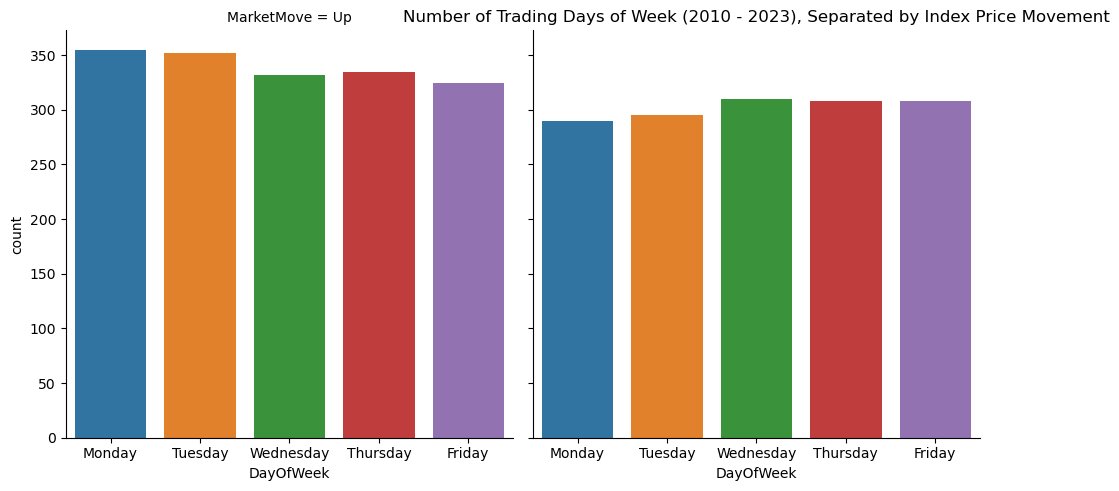

In [44]:
sns.catplot(kind = 'count', data = NSEI, x = 'DayOfWeek', col = 'MarketMove', order = dayOrder)
plt.title('Number of Trading Days of Week (2010 - 2023), Separated by Index Price Movement')

Overall, there are some time periods where there is a higher chance that index price is going to go down given that it's a Friday (compared to other days of the week). But when we look at longer time periods, this chance balances out and we get an almost equal chance for each day of the week - this is what we looked at first (and recreated above), the <i>Number of Trading Days of Week (2010 - 2023), Separated by Index Price Movement</i> plot closely resembles an Equal Probaility Distribution plot if we consider Ups and Downs in separate plots. Probably, when we look at an even longer periods the resemblence will be even more close.

Why does it happen(when it does), and is there a way to identify those specific periods? The data we have doesn't contain enough information on that, and also that's outside the scope of the current discussion. Probably a Stock Market Expert can provide more clarity here. There is something called Friday/Monday/Weekend Effect of Stock Market Prices, which talks about something similar - but not quite.

Anyway, so to make money, should you invest in Index on Fridays (when markets are supposed to go down)? In short, there is no evidence to support that.